In [ ]:
# hello this is 심상균

In [45]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

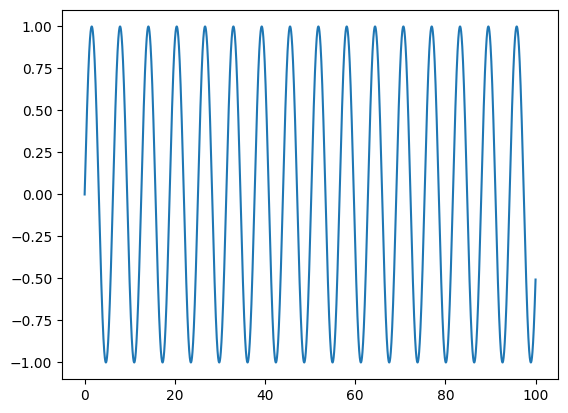

In [ ]:
# 임의의 시계열 데이터 생성 (사인파)
def generate_sin_wave(seq_length, num_sequences):
    # linspace : 0과 100을 seq_length * num_sequences 개수만큼 쪼개서 리스트로 만들어 버렷! >_<
    x = np.linspace(0, 100, seq_length * num_sequences)
    y = np.sin(x)
    # reshape : 개념은 좀 어려울 수 있으니 모르면 걍 검색하셈 ㅇㅇ,, 대충 num_sequences 차원으로 하나 나누고 seq_length 차원으로 한번 더 나눈거라 생각하셈
    return y.reshape(num_sequences, seq_length, 1)

seq_length = 50  # 시퀀스 길이
num_sequences = 1000  # 시퀀스 개수
data = generate_sin_wave(seq_length, num_sequences) # 데이터 생성하기!!

# 데이터 그래프 그리기
x = np.linspace(0, 100, seq_length * num_sequences)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [70]:
# 데이터셋 분리
split = int(0.8 * num_sequences)
train_data = data[:split]
test_data = data[split:]

In [72]:
print(data)

[[[ 0.        ]
  [ 0.00200004]
  [ 0.00400007]
  ...
  [ 0.0938635 ]
  [ 0.09585452]
  [ 0.09784516]]

 [[ 0.09983541]
  [ 0.10182525]
  [ 0.10381469]
  ...
  [ 0.1927892 ]
  [ 0.19475133]
  [ 0.19671268]]

 [[ 0.19867325]
  [ 0.20063302]
  [ 0.20259199]
  ...
  [ 0.28978853]
  [ 0.29170217]
  [ 0.29361464]]

 ...

 [[-0.73723645]
  [-0.73588368]
  [-0.73452796]
  ...
  [-0.67056415]
  [-0.66907908]
  [-0.66759133]]

 [[-0.66610091]
  [-0.66460783]
  [-0.66311209]
  ...
  [-0.59315094]
  [-0.59153954]
  [-0.58992578]]

 [[-0.58830965]
  [-0.58669117]
  [-0.58507034]
  ...
  [-0.50981093]
  [-0.5080893 ]
  [-0.50636564]]]


In [65]:
# 모델 구축
# Sequential : Keras 에서 제공하는 신경망 모델 클래스임 간단하게 레이어를 순차적으로 쌓아서 신경망을 구성할때 사용함
model = Sequential()

# 전체 LSTM 퍼셉트론 개수는 50개야~~ 그리고 내부의 활성화 함수는 뤨루임~~  타임스텝은 시퀀스 길이만큼이야 특징은 하나밖에 없지
# 그러면 그시기 그시기 해서 잘 뿅뿅 해서 모델이 만들어져 
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
# 50개의 퍼셉트론에서의 출력값을 하나로 짬뽕해서 최종 출력은 임의의 실후가 될거야~
model.add(Dense(1))
# 모델은 아담아담으로 최적화하고 평균제곱오차로 손실값 정할거야
model.compile(optimizer='adam', loss='mse')

/Volumes/looparam/#1 Coding/#10 Python/AcademicFestival/AF/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
# 모델 구축 예시
# return_sequences = True를 한 경우에는 각 time step별 hidden state들이 출력된다.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from numpy import array

# 타임스텝이 3, 특징이 1개인 인풋 그시기 생성
# 특징의 개수는 주가, 거래량, 온도 등의 다양한 정보를 한번에 입력할때 1보다 커짐
# Input 은 입력 데이터의 모양을 정함
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(3, return_sequences=False)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)

data = array([0.1, 0.2, 0.3]).reshape((1,3,1))

print(data)
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[-0.07444429  0.0071409  -0.06345224]]


In [76]:
# 모델 학습
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3547e-05
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4212e-05
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1335e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2854e-05
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6193e-05
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3296e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1806e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2783e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9011e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1519e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2070e-05
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7708e-05
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1495e-05
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7362e-05
Epoch 15/20
25/25 ━━━━━━━━━━━

In [77]:
X_test = test_data[:, :-1]
y_test = test_data[:, -1]
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


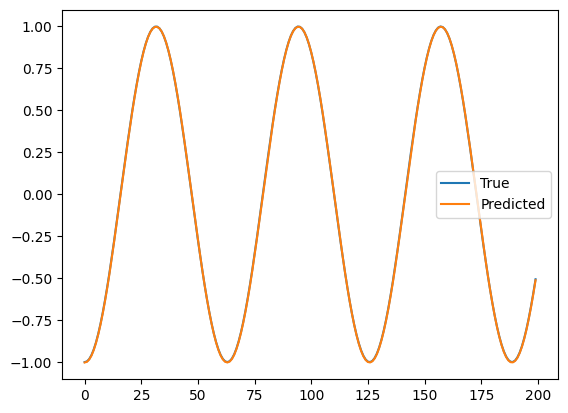

In [78]:
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [88]:
model.save('mnist_model.keras')

In [89]:
# 모델 불러오기
loaded_model = tf.keras.models.load_model('./mnist_model.keras')

# 모델 아키텍처 확인
loaded_model.summary()

# 모델 컴파일 정보 확인
print("Optimizer:", loaded_model.optimizer)
print("Loss function:", loaded_model.loss)
print("Metrics:", loaded_model.metrics_names)

# 모델의 가중치 확인
weights = loaded_model.get_weights()
print("Model weights:", weights)

# 불러온 모델을 사용하여 예측
predictions = loaded_model.predict(X_test)

# 예측 결과 확인 (예: 첫 번째 테스트 이미지의 예측 결과)
print(predictions[0])  # softmax 출력
print(np.argmax(predictions[0]))  # 예측된 클래스

/Volumes/looparam/#1 Coding/#10 Python/AcademicFestival/AF/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,904 (81.66 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,453 (40.84 KB)

Optimizer: <keras.src.optimizers.rmsprop.RMSprop object at 0x158bf3160>
Loss function: mse
Metrics: ['loss']
Model weights: [array([[ 1.55040458e-01,  1.55596405e-01, -1.04700893e-01,
         3.29770818e-02, -9.09677986e-03, -5.14056012e-02,
         1.02514207e-01, -6.08335659e-02,  4.88915443e-02,
        -1.34939849e-01,  2.64405273e-02, -1.52548164e-01,
         1.42039195e-01, -1.74829468e-01, -1.06818005e-01,
        -4.02251892e-02,  1.13713831e-01,  3.09253875e-02,
        -1.44091129e-01,  1.05331458e-01, -1.37601256e-01,
        -4.02379856e-02,  8.53763744e-02,  9.49525610e-02,
        -1.38593018e-01,  6.76450506e-02, -1.10921569e-01,
        -8.26558247e-02,  1.01965681e-01,  1.02438077e-01,
         7.92893618e-02, -1.29839517e-02,  8.53338391e-02,
        -4.16732207e-02,  7.77471811e-03, -3.63531034e-03,
        -7.91928247e-02,  1.64681762e-01, -1.16098255e-01,
         1.45137817e-01, -6.90953759e-03, -5.11916578e-02,
         2.25658938e-02,  8.82538036e-02,  5.7429